In [146]:
# install packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# Read in cleaned dataset
education = pd.read_csv('C:\\Users\\mboke\\Documents\\2020\\Summer II\\Tech Bootcamp\\CleanedEducation.csv', index_col=0)

In [148]:
# create counts of labels for a given column
def counts_function(column):
    # pull all values for that label in function
    all_values = education[column]
    # initialize dictionary
    counter = {}
    # fill dictionary with key value pairs to find the most common entry
    for word in all_values:
        if not pd.isnull(word):
            if word in counter:
                counter[word]+=1
            else:
                counter[word]=1
    return counter

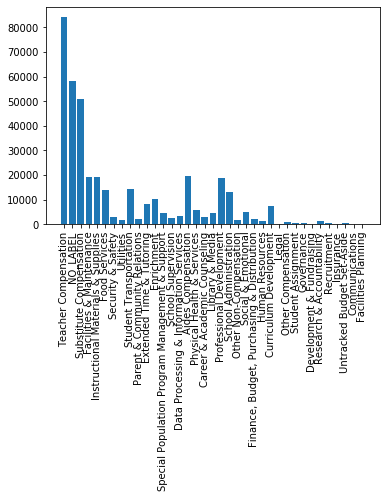

In [149]:
# Create dictionary of counts for each function value
function_counts = counts_function("Function")

# Plot bar plot of function values
plt.bar(function_counts.keys(), function_counts.values())
plt.xticks(rotation=90)
plt.show()

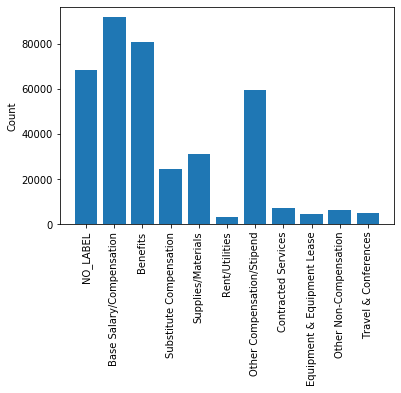

In [150]:
#Create dictionary of counts for each object type
object_counts = counts_function("Object_Type")

# Plot bar plot of object type counts
plt.bar(object_counts.keys(), object_counts.values())
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

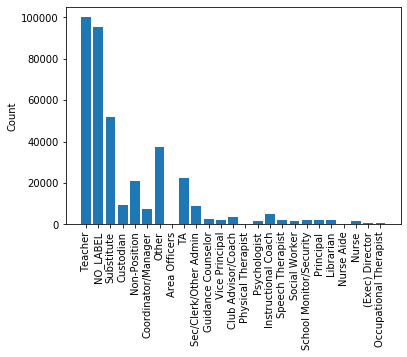

In [151]:
#Create dictionary of counts for each Position_type
position_counts = counts_function("Position_Type")

# Plot bar plot of Position_Type counts
plt.bar(position_counts.keys(), position_counts.values())
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

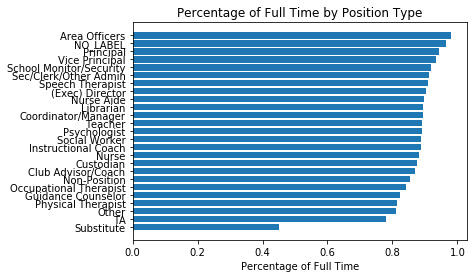

In [152]:
# Full time with position type
position_type_by_position = education.groupby(['Position_Type'])['FTE'].mean().sort_values()
plt.barh(position_type_by_position.index, position_type_by_position)
plt.title('Percentage of Full Time by Position Type')
plt.xlabel('Percentage of Full Time')
plt.show()

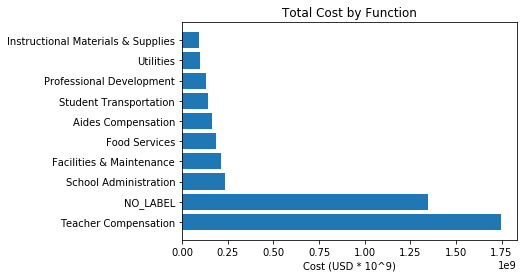

In [153]:
# Create a chart to show relationship between function values and total cost
function_total_cost = education.groupby(['Function'])['Total'].sum().sort_values(ascending=False).head(10)
plt.barh(function_total_cost.index, function_total_cost)
plt.title('Total Cost by Function')
plt.xlabel('Cost (USD * 10^9)')
plt.show()

In [154]:
# Find the most costly function - average
education.groupby(['Function'])['Total'].mean().sort_values(ascending=False).head(5)

Function
Insurance                     61575.508947
Development & Fundraising     57460.958743
Utilities                     52748.094225
Legal                         42297.154348
Untracked Budget Set-Aside    32687.850680
Name: Total, dtype: float64

In [155]:
# Find the most costly function by total
education.groupby(['Function'])['Total'].sum().sort_values(ascending=False).head(5)

Function
Teacher Compensation        1.747270e+09
NO_LABEL                    1.347181e+09
School Administration       2.344820e+08
Facilities & Maintenance    2.121091e+08
Food Services               1.856098e+08
Name: Total, dtype: float64

In [156]:
# Finding 5 most costly combinations of function and Object_Type: 
education.groupby(['Function','Object_Type'])['Total'].mean().sort_values(ascending=False).head(5)

Function                   Object_Type        
Aides Compensation         Contracted Services    645763.702000
Student Transportation     Rent/Utilities         379006.472656
Research & Accountability  Contracted Services    292794.786279
Legal                      Contracted Services    228811.093333
Development & Fundraising  Contracted Services    226256.945455
Name: Total, dtype: float64

In [157]:
# Find the maximum value for the total cost of expenditure
max(education.Total)

129699999.22

In [158]:
# Find the observation for the maximum value
education.loc[education.Total==max(education.Total)]

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
278097,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,"Operating, Not PreK-12",Payments to a Community School*,...,Tuition And Other Similar Payments,School,1.0,Other Regular,All Campus Payroll,PROFESSIONAL-INSTRUCTIONAL,1.297000e+08,EMPLOYEE BENEFITS,General,SPECIAL PROJECTS-FINANCIA SPECIAL PROJECTS-FI...


In [159]:
# check the rest of the highest cost entries to see if the top value is unreasonable
education.sort_values(by='Total', ascending=False).head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
278097,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,"Operating, Not PreK-12",Payments to a Community School*,...,Tuition And Other Similar Payments,School,1.0,Other Regular,All Campus Payroll,PROFESSIONAL-INSTRUCTIONAL,1.297000e+08,EMPLOYEE BENEFITS,General,SPECIAL PROJECTS-FINANCIA SPECIAL PROJECTS-FI...
197686,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Other Purchased Services,...,Other Purchased Services *,School,1.0,Health Services,All Campus Payroll,PROFESSIONAL-INSTRUCTIONAL,5.323797e+07,EMPLOYEE BENEFITS,Employee Benefits Self-Insurance,SELF INSURANCE SELF INSURANCE
150721,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,PAYMENTS TO ESCROW AGENTS,...,Extra Duty Pay/Overtime For Support Personnel,DISTRICT WIDE ORGANIZATION UNI,1.0,GOB's REFUNDING,All Campus Payroll,UNDESIGNATED,4.789057e+07,DEBT SERVICE,General Operating Fund,DEBT SERVICEBOND REDEMPTION DEBT SERVICE
24931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,INTEREST ON LEASES,...,Extra Duty Pay/Overtime For Support Personnel,DISTRICT WIDE ORGANIZATION UNI,1.0,PCOPS-LEASE PAYMENTS,All Campus Payroll,UNDESIGNATED,3.956446e+07,DEBT SERVICE,General Operating Fund,DEBT SERVICEPENSION COPS DEBT SERVICE
68319,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,BUILDINGS,...,Extra Duty Pay/Overtime For Support Personnel,School,1.0,GVR GOB,All Campus Payroll,UNDESIGNATED,3.645094e+07,BUILDING ACQUISITION AND CONST,General Operating Fund,BUILDING ACQUISITION AND CONSTBOND EXPENDITURE...


In [160]:
# Also note the negative values for the bottom 5 total cost of expenditure
education.sort_values(by='Total').head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
273740,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,BUILDINGS,...,Extra Duty Pay/Overtime For Support Personnel,DISTRICT WIDE ORGANIZATION UNI,1.0,NON-PROJECT,All Campus Payroll,UNDESIGNATED,-87466307.15,UNDESIGNATED,General Operating Fund,UNDESIGNATED UNDESIGNATED
274157,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,PAYMENTS TO ESCROW AGENTS,...,Extra Duty Pay/Overtime For Support Personnel,DISTRICT WIDE ORGANIZATION UNI,1.0,NON-PROJECT,All Campus Payroll,UNDESIGNATED,-47890569.54,DEBT SERVICE,General Operating Fund,DEBT SERVICEUNDESIGNATED DEBT SERVICE
208029,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,REDEMPTION OF PRINCIPAL,...,Extra Duty Pay/Overtime For Support Personnel,DISTRICT WIDE ORGANIZATION UNI,1.0,NON-PROJECT,All Campus Payroll,UNDESIGNATED,-26464999.51,DEBT SERVICE,General Operating Fund,DEBT SERVICEUNDESIGNATED DEBT SERVICE
132729,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,OPERATING TRANSFERS TO OTHER FUNDS,...,Extra Duty Pay/Overtime For Support Personnel,ADMIN. SERVICES,1.0,FACILITIES - ACQ & CONSTR,All Campus Payroll,PROFESSIONAL-INSTRUCTIONAL,-23999999.99,Misc,Capital Projects Fund,
70451,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,OPERATING TRANSFERS TO OTHER FUNDS,...,Extra Duty Pay/Overtime For Support Personnel,ADMIN. SERVICES,1.0,OTHER OUTLAYS,All Campus Payroll,PROFESSIONAL-INSTRUCTIONAL,-23999663.97,Misc,General Fund,
